In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import corner
from scipy import integrate
from scipy import optimize as op
import utilities as utes
%matplotlib inline

In [2]:
data = np.genfromtxt("spiralGalaxies.tbl")
print data.shape

(780, 6)


In [3]:
lvel = data[:,1]
elv = data[:,2]*0.001
mag = data[:,4]
emag = data[:,5]*0.01

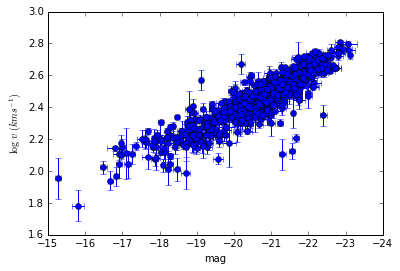

In [4]:
plt.errorbar(mag,lvel,yerr=elv,xerr=emag,ls='',marker='o')
plt.xlim(-15,-24)
plt.ylabel(r"$\log\ v\ (km s^{-1})$")
plt.xlabel("mag")
plt.gcf().savefig("figures/tully_fisher.eps")

In [5]:
plt.clf()

In [6]:
#Let's define some probabilities
def logpr(a,b):
    #return 1. + 1. #flat prior
    return 1./(1+b**2)**(3./2.) #rotationally flat

def logp(params,x,y,sigx,sigy):
    a,b = params
    ymodel = a+b*x
    return -1./2.*np.sum((y-ymodel)**2/(sigx**2+b**2*sigy**2)) + logpr(a,b)

def nlogp(params,x,y,sigx,sigy):
    return -logp(params,x,y,sigx,sigy)

In [7]:
x,y = mag,lvel
sigx, sigy = elv,emag
res = op.minimize(nlogp,x0=[0.0,0.16],args =(x,y,sigx,sigy),method="Powell")
print res
a,b = res['x']

   direc: array([[ 1.        ,  0.        ],
       [-5.88988517, -0.28691357]])
     fun: 2463.025303426652
 message: 'Optimization terminated successfully.'
    nfev: 114
     nit: 4
  status: 0
 success: True
       x: array([-0.13546888, -0.12581669])


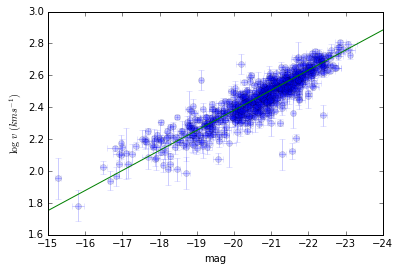

In [8]:
plt.errorbar(mag,lvel,yerr=elv,xerr=emag,ls='',marker='o',alpha=0.2)
plt.xlim(-15,-24)
plt.ylabel(r"$\log\ v\ (km s^{-1})$")
plt.xlabel("mag")
xfit = np.linspace(-15,-24,100)
yfit = a + b*xfit
plt.plot(xfit,yfit)
plt.gcf().savefig("figures/tully_fisher_fit.eps")

In [10]:
plt.clf()